In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
DF_PATH="..\data\processed\dataframe.pkl"
FIG_DIR=r"..\reports\figures"

ROLE_COLS=["DevType"]
TECH_COLS=["LanguageHaveWorkedWith",
           'DatabaseHaveWorkedWith',
           'PlatformHaveWorkedWith',
           'WebframeHaveWorkedWith',
           'MiscTechHaveWorkedWith',
           'ToolsTechHaveWorkedWith',
           'NEWCollabToolsHaveWorkedWith'
           ]

In [3]:
raw_df=pd.read_pickle(DF_PATH)


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
df=raw_df.copy()
encoded_dfs={}
for col in ROLE_COLS+TECH_COLS:
    binalizer=MultiLabelBinarizer()
    encoded_df=pd.DataFrame(binalizer.fit_transform(df[col]),
                            columns=binalizer.classes_,
                            index=df[col].index)
    # print(binalizer.classes_)
    encoded_dfs[col]=encoded_df



In [6]:
df=pd.concat(encoded_dfs,axis=1)
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

FIRST STAGE WHICH IS FREQUENCY OF EACH JOb

DISPLAY JOP FREQENCY

In [7]:
df["DevType"].sum().sort_values()

Marketing or sales professional                    638
Scientist                                         2015
Senior Executive (C-Suite, VP, etc.)              2103
Developer, game or graphics                       2112
Educator                                          2369
Engineer, site reliability                        2448
Academic researcher                               2899
Product manager                                   3074
Other (please specify):                           3545
Developer, QA or test                             3611
Data or business analyst                          3792
Engineering manager                               3810
Engineer, data                                    4176
Student                                           4187
Data scientist or machine learning specialist     4273
Developer, embedded applications or devices       4598
Designer                                          4611
Database administrator                            5655
System adm

FIRST STAGE WHICH IS FREQUENCY OF EACH skill

DISPLAY skills FREQENCY

In [8]:

skills_freq=df.drop("DevType",axis=1).sum().reset_index()
skills_freq.sort_values(0,ascending=False)
skills_freq.columns=["group","skill","frequency"]
skills_freq

,group,skill,frequency
0,LanguageHaveWorkedWith,APL,536
1,LanguageHaveWorkedWith,Assembly,4632
2,LanguageHaveWorkedWith,Bash/Shell,22385
3,LanguageHaveWorkedWith,C,17329
4,LanguageHaveWorkedWith,C#,22984
...,...,...,...
120,NEWCollabToolsHaveWorkedWith,Vim,19752
121,NEWCollabToolsHaveWorkedWith,Visual Studio,26970
122,NEWCollabToolsHaveWorkedWith,Visual Studio Code,58026
123,NEWCollabToolsHaveWorkedWith,Webstorm,6564


In [9]:
import plotly.express as px
import os 

In [10]:
fig=px.treemap(skills_freq,
               path=["group",'skill'],
               values='frequency',
               color_continuous_scale="deep",
               color='frequency'
               )
fig.update_layout(width=1400,height=700)
fig.show()
fig.write_html(os.path.join(FIG_DIR, 'treemap_skills_freq.html'))


Create role skills heat mab

example
   role:        git  c++  python
frontend      .8    .3    .1
backend       .8     .3    .6
data scient    .9     .1     .9

In [12]:
sorted_roles=df['DevType'].sum().sort_values(ascending=False).index.to_list()
sorted_skills=df[(TECH_COLS)].sum().sort_values(ascending=False).droplevel(level=0).index.to_list()
sorted_skills

['Git',
 'Visual Studio Code',
 'JavaScript',
 'HTML/CSS',
 'Python',
 'SQL',
 'Docker',
 'MySQL',
 'Java',
 'AWS',
 'PostgreSQL',
 'Node.js',
 'Visual Studio',
 'React.js',
 'TypeScript',
 'Notepad++',
 'IntelliJ',
 'C#',
 'SQLite',
 'Bash/Shell',
 'jQuery',
 'C++',
 'Vim',
 'MongoDB',
 'Microsoft SQL Server',
 'Android Studio',
 'PHP',
 'C',
 'Sublime Text',
 'Google Cloud Platform',
 '.NET Framework',
 'Microsoft Azure',
 'NumPy',
 'PyCharm',
 '.NET Core / .NET 5',
 'Express',
 'Redis',
 'Angular',
 'Pandas',
 'Eclipse',
 'Yarn',
 'Heroku',
 'Kubernetes',
 'MariaDB',
 'Vue.js',
 'ASP.NET Core ',
 'Firebase',
 'Atom',
 'IPython/Jupyter',
 'Flask',
 'ASP.NET',
 'DigitalOcean',
 'Django',
 'Elasticsearch',
 'Spring',
 'Xcode',
 'PowerShell',
 'Oracle',
 'TensorFlow',
 'Go',
 'Angular.js',
 'Unity 3D',
 'React Native',
 'Kotlin',
 'Flutter',
 'Webstorm',
 'Laravel',
 'PHPStorm',
 'NetBeans',
 'Rust',
 'Ansible',
 'Ruby',
 'Terraform',
 'DynamoDB',
 'Dart',
 'Keras',
 'Qt',
 'Torch/PyTor

In [13]:
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [14]:
skills=[]
for role in sorted_roles:
    mask_role=(df[('DevType',role)]==1)
    # print(mask_role)
    percentage_skills_per_role=pd.concat({tech_cols:df.loc[mask_role,tech_cols].mean()*100 for tech_cols in TECH_COLS } )
    # print(percentage_skills_per_role)
    skills.append(percentage_skills_per_role)
skills=pd.concat(skills,axis=1)
skills.columns=sorted_roles
skills=skills.reset_index(level=0,drop=True)    
skills=skills.loc[sorted_skills]
skills=skills.T
skills
skills.shape

(25, 125)

In [15]:
print(skills.columns.to_list())

['Git', 'Visual Studio Code', 'JavaScript', 'HTML/CSS', 'Python', 'SQL', 'Docker', 'MySQL', 'Java', 'AWS', 'PostgreSQL', 'Node.js', 'Visual Studio', 'React.js', 'TypeScript', 'Notepad++', 'IntelliJ', 'C#', 'SQLite', 'Bash/Shell', 'jQuery', 'C++', 'Vim', 'MongoDB', 'Microsoft SQL Server', 'Android Studio', 'PHP', 'C', 'Sublime Text', 'Google Cloud Platform', '.NET Framework', 'Microsoft Azure', 'NumPy', 'PyCharm', '.NET Core / .NET 5', 'Express', 'Redis', 'Angular', 'Pandas', 'Eclipse', 'Yarn', 'Heroku', 'Kubernetes', 'MariaDB', 'Vue.js', 'ASP.NET Core ', 'Firebase', 'Atom', 'IPython/Jupyter', 'Flask', 'ASP.NET', 'DigitalOcean', 'Django', 'Elasticsearch', 'Spring', 'Xcode', 'PowerShell', 'Oracle', 'TensorFlow', 'Go', 'Angular.js', 'Unity 3D', 'React Native', 'Kotlin', 'Flutter', 'Webstorm', 'Laravel', 'PHPStorm', 'NetBeans', 'Rust', 'Ansible', 'Ruby', 'Terraform', 'DynamoDB', 'Dart', 'Keras', 'Qt', 'Torch/PyTorch', 'Assembly', 'Ruby on Rails', 'Emacs', 'Swift', 'R', 'Neovim', 'VBA', 'Ma

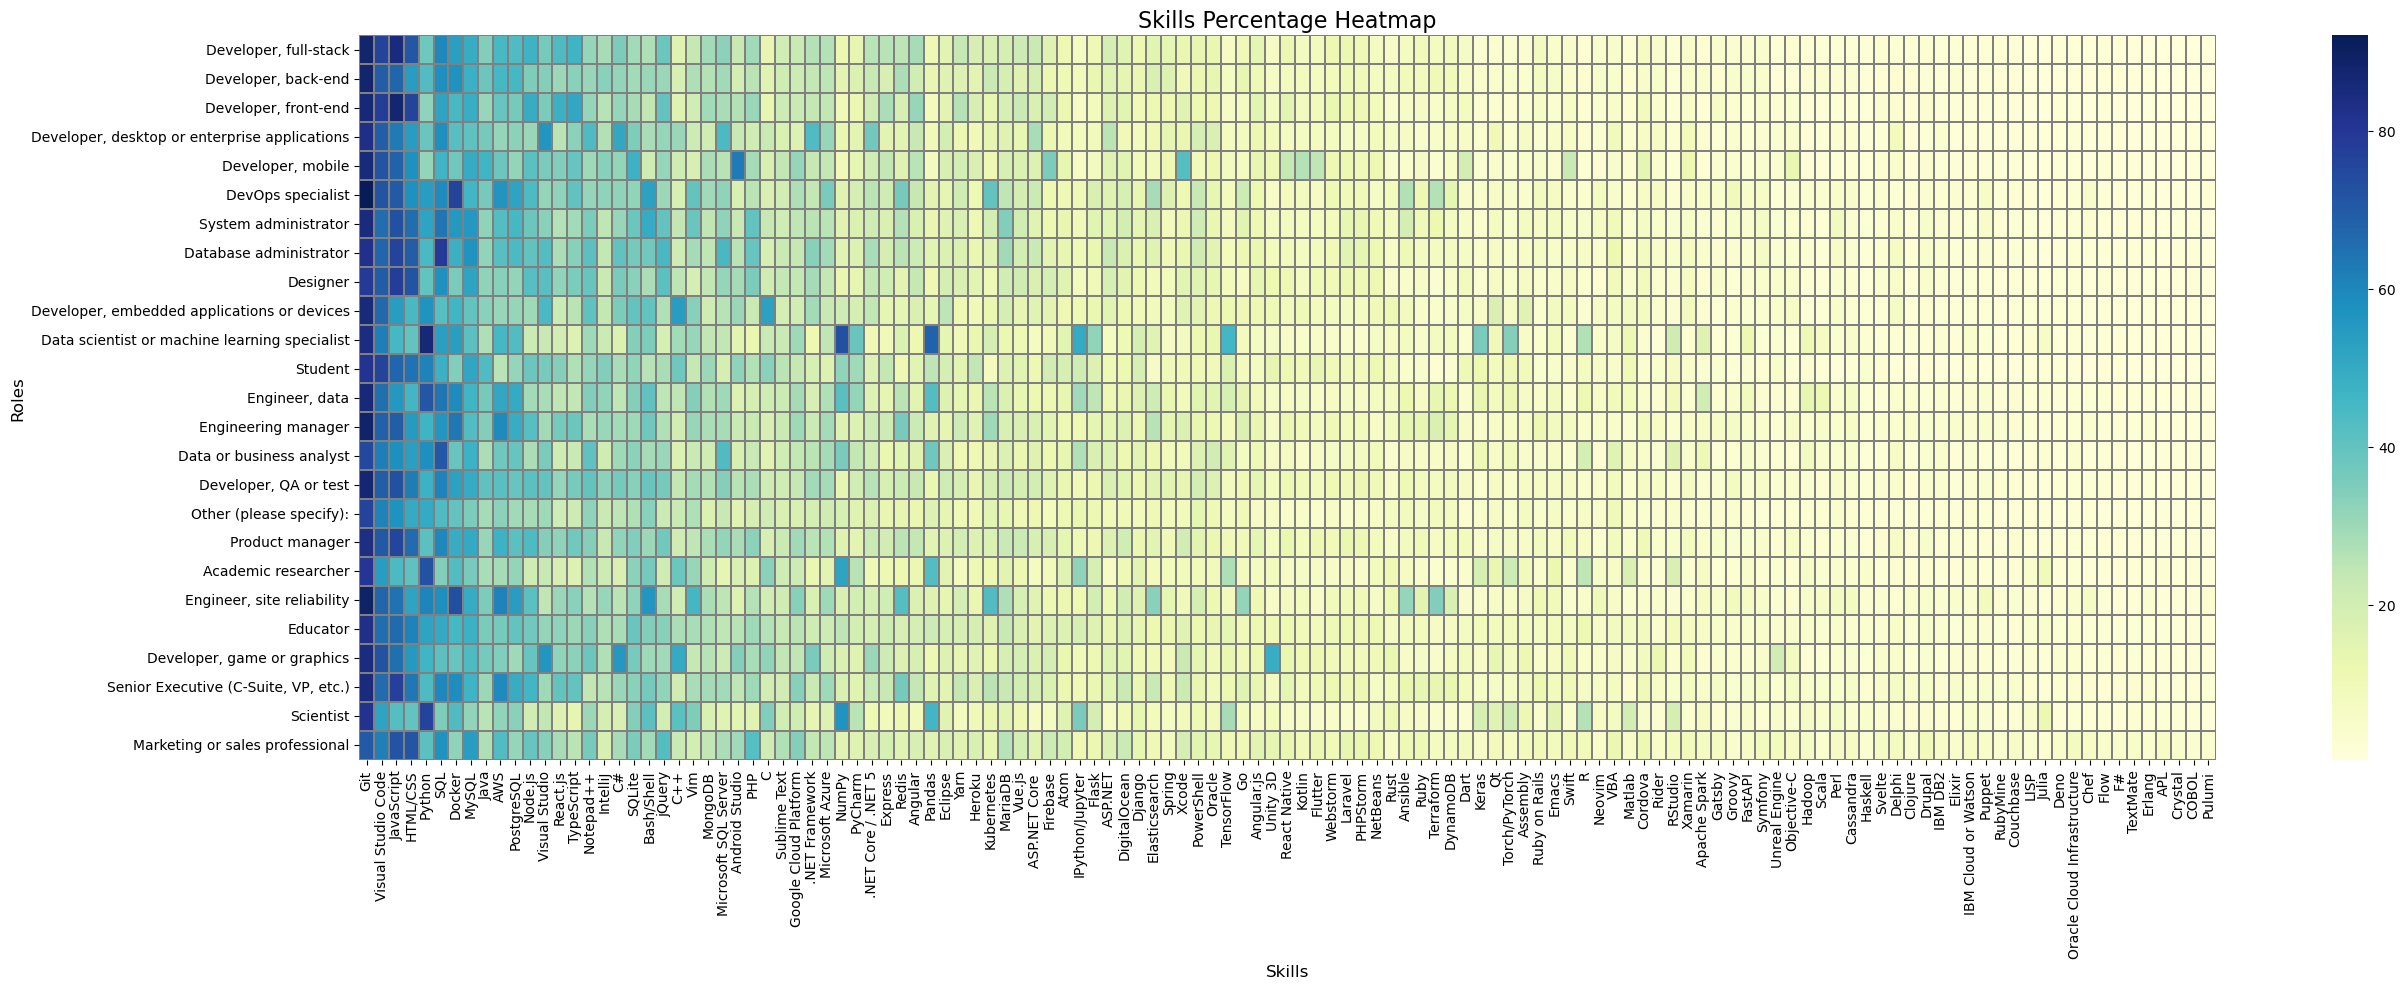

<Figure size 640x480 with 0 Axes>

(25, 125)


In [16]:


# Assuming `skills` is a DataFrame where rows are skills and columns are roles or other attributes
plt.figure(figsize=(27, 10),)  # Adjust the figure size for better readability

# Creating the heatmap
sns.heatmap(data=skills, 
            xticklabels=skills.columns,
            yticklabels=skills.index,
         # fmt='.2f',              # Format for the annotations
            cmap='YlGnBu',          # Color palette
            linewidths=0.2,         # Lines between cells
            linecolor='gray',       # Line color between cells
            # cbar_kws={'shrink': 0.7, 'label': 'Percentage'},  # Shrink color bar and add label
            square=False)                   # Make the cells square-shaped

# Rotate x-axis labels for better readability if necessary
# plt.xticks(rotation=45, ha='right') 

# Add title and labels
plt.title('Skills Percentage Heatmap', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Roles', fontsize=12)

# Show the plot
plt.tight_layout()  # Automatically adjust subplot parameters for a cleaner layout
plt.show()
plt.savefig(os.path.join(FIG_DIR, 'heatmap_skills_freq.png'))
plt.show()
print(skills.shape)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
hieraricey=AgglomerativeClustering()



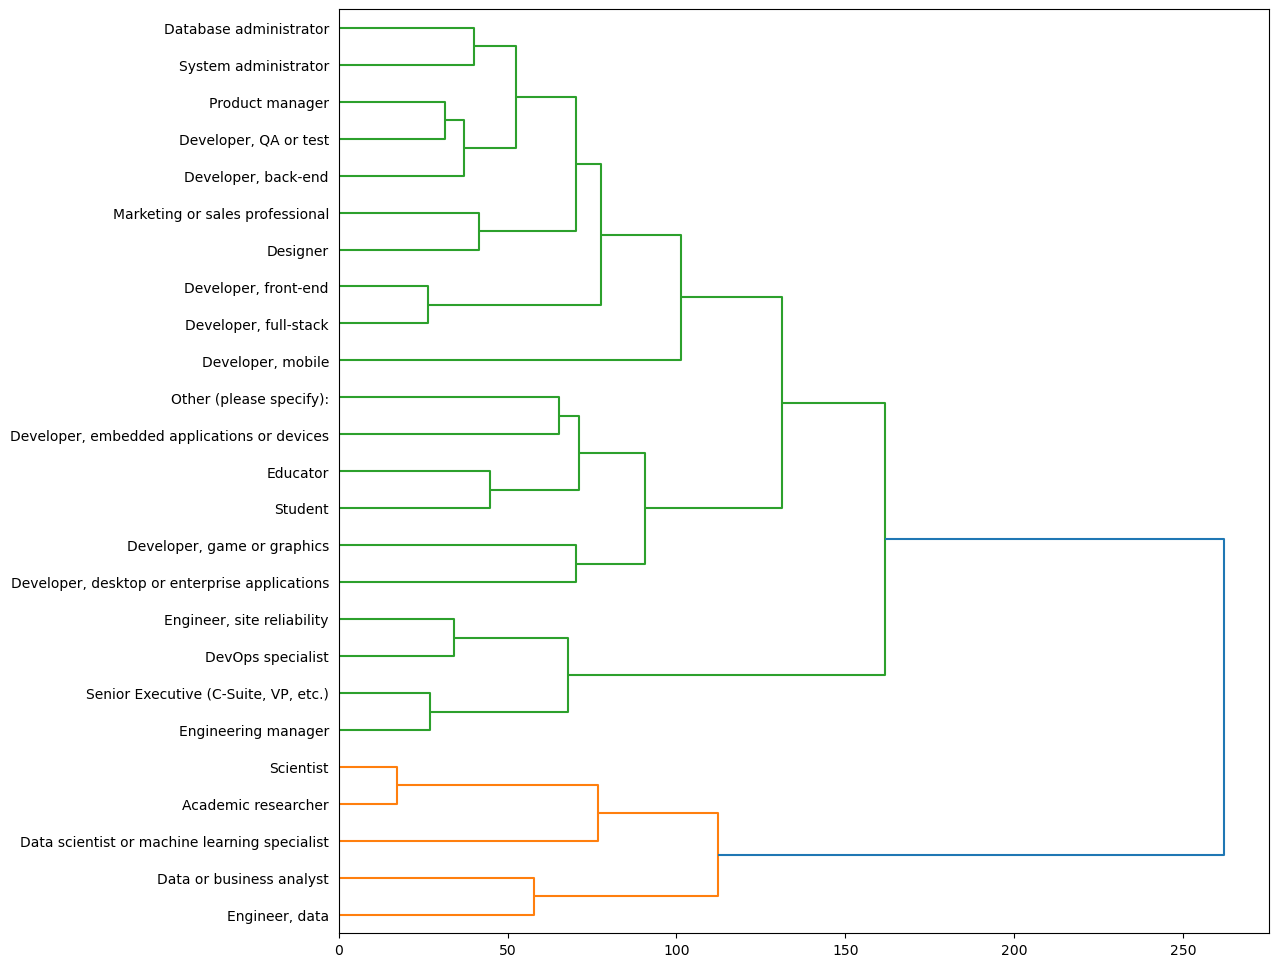

<Figure size 640x480 with 0 Axes>

In [20]:
from scipy.cluster.hierarchy import dendrogram,linkage
# from scipy.cluster.hierarchy import dendrogram
z=linkage(skills,method='ward')
plt.figure(figsize=(12,12))
dendrogram(z,labels=skills.index,orientation='right')  
plt.show()
plt.savefig(os.path.join(FIG_DIR,"dendrogram jobs.png"))


Standardization skills


In [21]:
from sklearn.preprocessing import StandardScaler
skills_std=StandardScaler().fit_transform(skills)
skills_std=pd.DataFrame(skills_std,columns=skills.columns,index=skills.index)
skills_std

,Git,Visual Studio Code,JavaScript,HTML/CSS,Python,SQL,Docker,MySQL,Java,AWS,...,Oracle Cloud Infrastructure,Chef,Flow,F#,TextMate,Erlang,APL,Crystal,COBOL,Pulumi
"Developer, full-stack",0.947205,1.480914,1.635974,1.290651,-1.003184,0.503980,0.367956,0.450170,0.137829,0.336241,...,-1.036310,-0.716666,-0.816459,-0.957688,-0.992953,-1.023807,-1.125065,-1.024232,-1.302685,-0.784945
"Developer, back-end",0.928336,0.287175,0.118124,-0.357734,-0.610327,0.318542,0.742040,0.202492,0.871715,0.383598,...,-0.875457,-0.534426,-1.201442,-0.906647,-0.971914,-0.485679,-1.044472,-0.922745,-1.261905,-0.644022
"Developer, front-end",0.586880,1.788769,1.867790,1.838950,-1.398753,-0.298787,-0.371743,0.402807,-0.515345,-0.241961,...,-1.026280,-0.970342,-0.253069,-1.222675,-0.896487,-1.102732,-0.966999,-1.066905,-1.139467,-0.913637
"Developer, desktop or enterprise applications",-0.107372,0.317467,-0.272186,-0.325553,-0.914933,0.309558,-0.609142,-0.943322,0.565374,-1.049781,...,-0.467322,-0.705918,-0.911949,0.116629,-0.900968,-1.056371,-0.676108,-0.546488,-0.293691,-0.754779
"Developer, mobile",0.420748,0.782163,0.191451,-0.026475,-1.460969,-0.769303,-1.017461,0.541050,2.509341,-0.370453,...,-0.870431,-0.914462,0.068124,-1.279872,-0.194433,-1.099719,-0.760566,-0.910085,-0.894178,-0.795899
DevOps specialist,1.829968,0.782167,0.343063,-0.003881,0.195651,0.461615,2.471812,-0.082547,0.525005,1.539779,...,-0.082625,1.839845,-0.300711,-0.066369,-0.464698,-0.059108,-0.760778,-0.205896,-0.673354,1.173290
System administrator,0.278077,-0.232423,0.555117,0.741608,0.034427,0.909124,0.580588,1.479049,-0.260249,0.115150,...,-0.043433,0.497514,-0.830132,-0.552708,-0.200967,-0.018718,-0.415414,0.199459,-0.249513,-0.265183
Database administrator,-0.304149,0.017999,0.904229,1.098949,-0.511527,2.365212,-0.067692,1.679867,-0.290581,0.046405,...,-0.124970,-0.155410,-0.410346,-0.156982,-0.238753,-0.115131,-0.471683,0.593062,0.165252,-0.220746
Designer,-0.952329,0.391685,1.003728,1.382099,-0.848613,0.293097,-1.198983,0.940457,-0.235453,-0.837970,...,-0.279252,-0.709764,0.062648,-0.593272,-0.382045,-0.601867,-0.173432,0.018380,0.261016,-0.382013
"Developer, embedded applications or devices",0.407384,-0.078112,-1.037350,-1.241778,0.390860,-1.221184,-0.226220,-1.064378,-0.078220,-1.089099,...,-0.386360,-0.570641,-0.439995,-0.274237,-0.549694,-0.008037,-0.233399,0.055446,-0.017103,-0.627939


<Axes: >

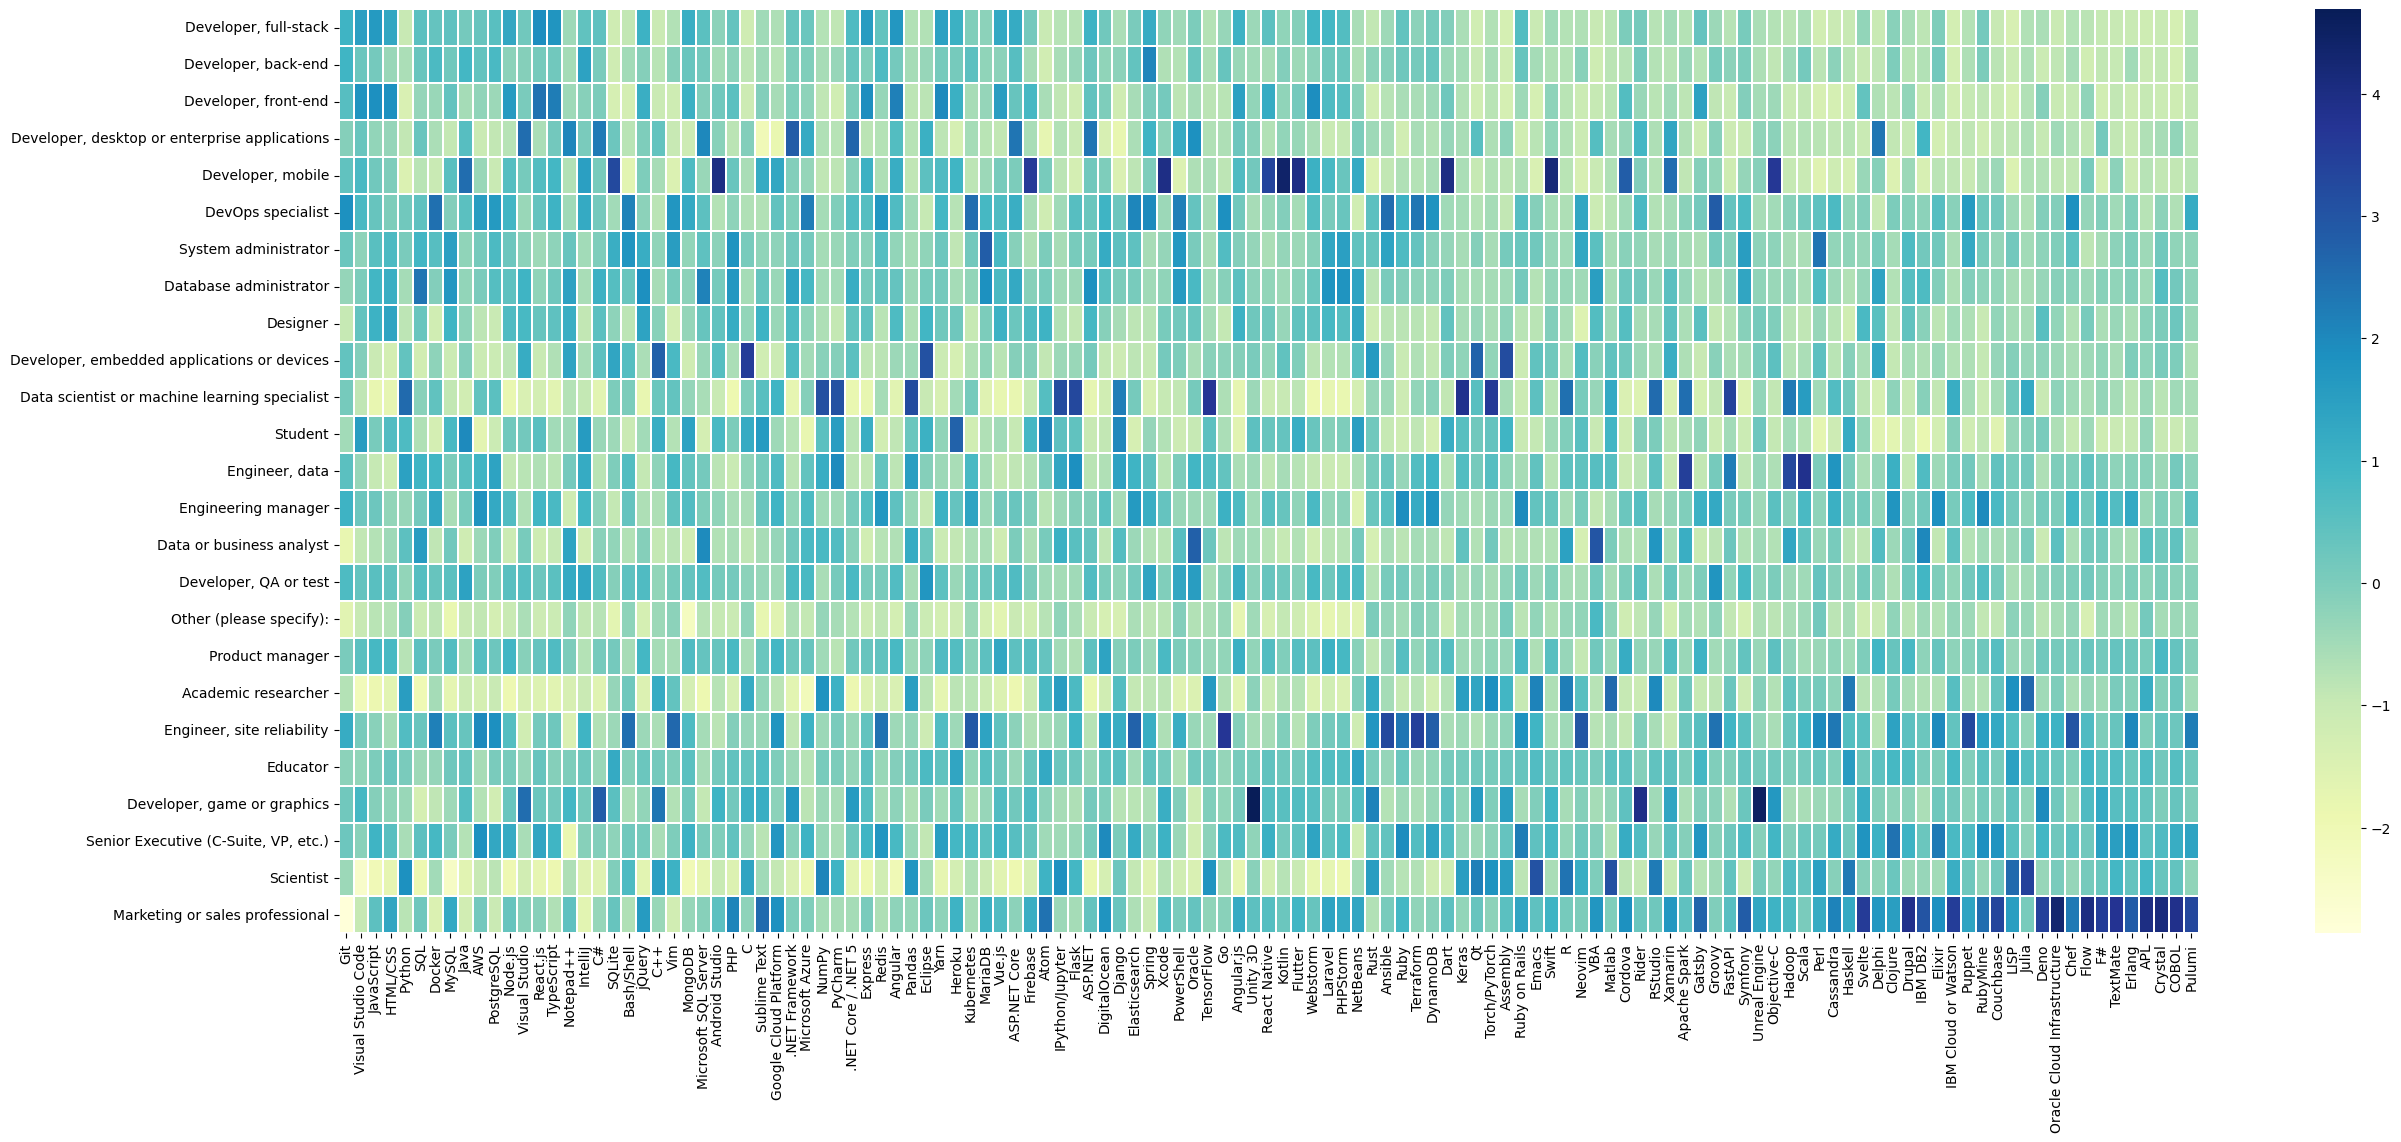

In [37]:
plt.figure(figsize=(30,12))
sns.heatmap(skills_std,xticklabels=skills.columns,yticklabels=skills.index,cmap='YlGnBu',linewidths=.3)

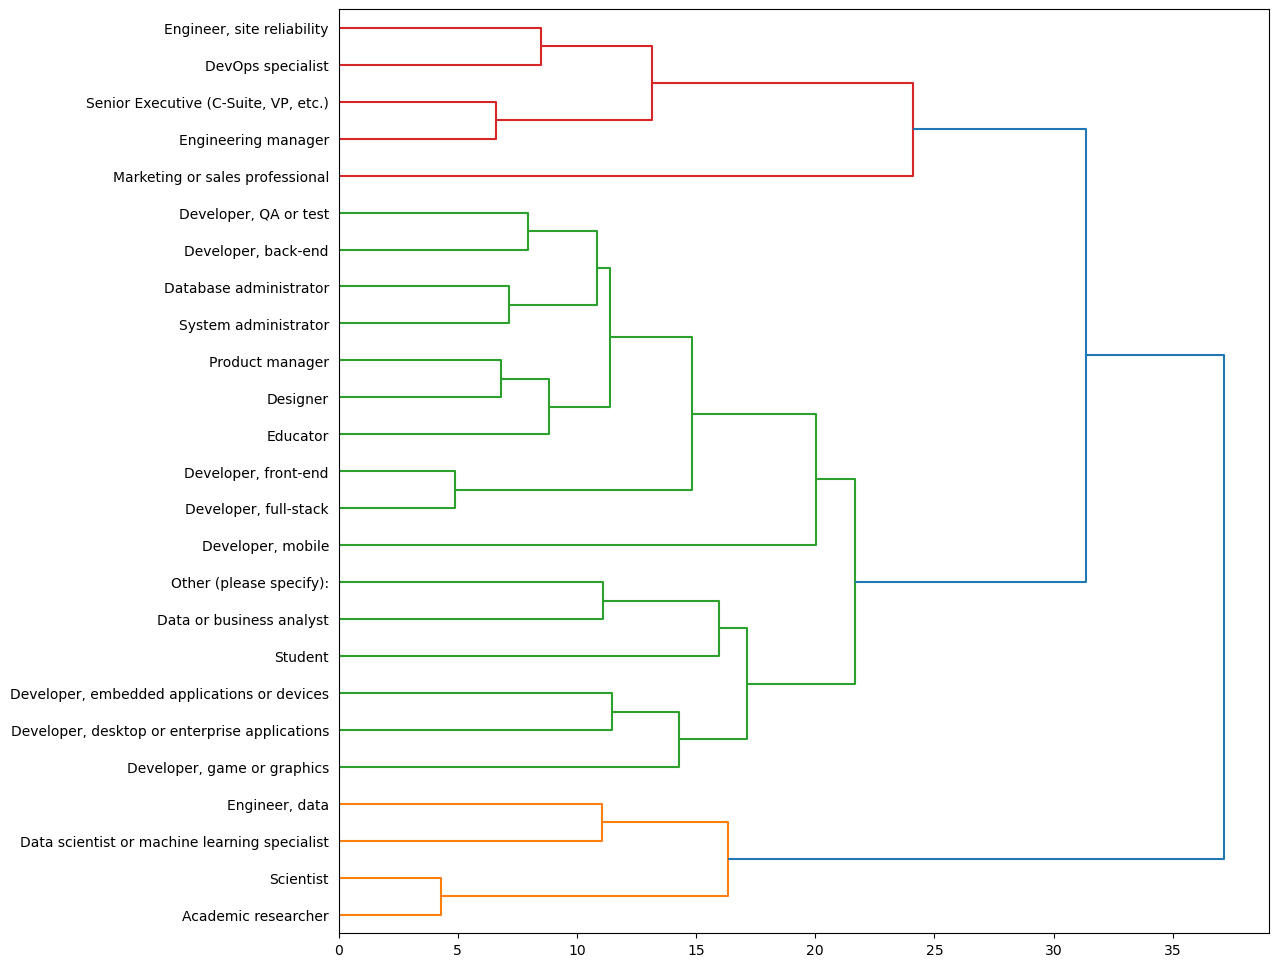

In [22]:
XX=linkage(skills_std,method='ward')
plt.figure(figsize=(12,12))
dendrogram(XX,labels=skills.index,orientation='right')
plt.show()

In [23]:
skills.loc["Developer, full-stack"]

Git                   87.938950
Visual Studio Code    76.154571
JavaScript            85.065823
HTML/CSS              70.973823
Python                37.864461
                        ...    
Erlang                 0.902983
APL                    0.392205
Crystal                0.665836
COBOL                  0.608069
Pulumi                 0.529020
Name: Developer, full-stack, Length: 125, dtype: float64

In [24]:
skills_std

,Git,Visual Studio Code,JavaScript,HTML/CSS,Python,SQL,Docker,MySQL,Java,AWS,...,Oracle Cloud Infrastructure,Chef,Flow,F#,TextMate,Erlang,APL,Crystal,COBOL,Pulumi
"Developer, full-stack",0.947205,1.480914,1.635974,1.290651,-1.003184,0.503980,0.367956,0.450170,0.137829,0.336241,...,-1.036310,-0.716666,-0.816459,-0.957688,-0.992953,-1.023807,-1.125065,-1.024232,-1.302685,-0.784945
"Developer, back-end",0.928336,0.287175,0.118124,-0.357734,-0.610327,0.318542,0.742040,0.202492,0.871715,0.383598,...,-0.875457,-0.534426,-1.201442,-0.906647,-0.971914,-0.485679,-1.044472,-0.922745,-1.261905,-0.644022
"Developer, front-end",0.586880,1.788769,1.867790,1.838950,-1.398753,-0.298787,-0.371743,0.402807,-0.515345,-0.241961,...,-1.026280,-0.970342,-0.253069,-1.222675,-0.896487,-1.102732,-0.966999,-1.066905,-1.139467,-0.913637
"Developer, desktop or enterprise applications",-0.107372,0.317467,-0.272186,-0.325553,-0.914933,0.309558,-0.609142,-0.943322,0.565374,-1.049781,...,-0.467322,-0.705918,-0.911949,0.116629,-0.900968,-1.056371,-0.676108,-0.546488,-0.293691,-0.754779
"Developer, mobile",0.420748,0.782163,0.191451,-0.026475,-1.460969,-0.769303,-1.017461,0.541050,2.509341,-0.370453,...,-0.870431,-0.914462,0.068124,-1.279872,-0.194433,-1.099719,-0.760566,-0.910085,-0.894178,-0.795899
DevOps specialist,1.829968,0.782167,0.343063,-0.003881,0.195651,0.461615,2.471812,-0.082547,0.525005,1.539779,...,-0.082625,1.839845,-0.300711,-0.066369,-0.464698,-0.059108,-0.760778,-0.205896,-0.673354,1.173290
System administrator,0.278077,-0.232423,0.555117,0.741608,0.034427,0.909124,0.580588,1.479049,-0.260249,0.115150,...,-0.043433,0.497514,-0.830132,-0.552708,-0.200967,-0.018718,-0.415414,0.199459,-0.249513,-0.265183
Database administrator,-0.304149,0.017999,0.904229,1.098949,-0.511527,2.365212,-0.067692,1.679867,-0.290581,0.046405,...,-0.124970,-0.155410,-0.410346,-0.156982,-0.238753,-0.115131,-0.471683,0.593062,0.165252,-0.220746
Designer,-0.952329,0.391685,1.003728,1.382099,-0.848613,0.293097,-1.198983,0.940457,-0.235453,-0.837970,...,-0.279252,-0.709764,0.062648,-0.593272,-0.382045,-0.601867,-0.173432,0.018380,0.261016,-0.382013
"Developer, embedded applications or devices",0.407384,-0.078112,-1.037350,-1.241778,0.390860,-1.221184,-0.226220,-1.064378,-0.078220,-1.089099,...,-0.386360,-0.570641,-0.439995,-0.274237,-0.549694,-0.008037,-0.233399,0.055446,-0.017103,-0.627939


In [25]:
# skills.sample(1).iloc[0].sort_values(ascending=False).to_list()[:15]
name_of_skill=skills.sample(1).index
name_of_skill=['Engineering manager']
sample=skills.loc[name_of_skill].iloc[0].sort_values(ascending=False)[:25]
sample.index
sample_std=skills_std.loc[name_of_skill][sample.index]
sample_std.values

array([[ 0.99491003,  0.26205232,  0.24926759,  1.28649898,  1.78700686,
         0.12612251, -0.29333541,  1.26412685, -0.33653211, -0.5651974 ,
         0.66291901,  0.78460385,  0.35299794,  0.89625728,  1.66217493,
         0.07656281,  0.41249302,  0.87757066, -0.93956497,  1.37099698,
         0.94155044, -0.22844281, -0.65544126,  0.74296687, -0.0246752 ]])

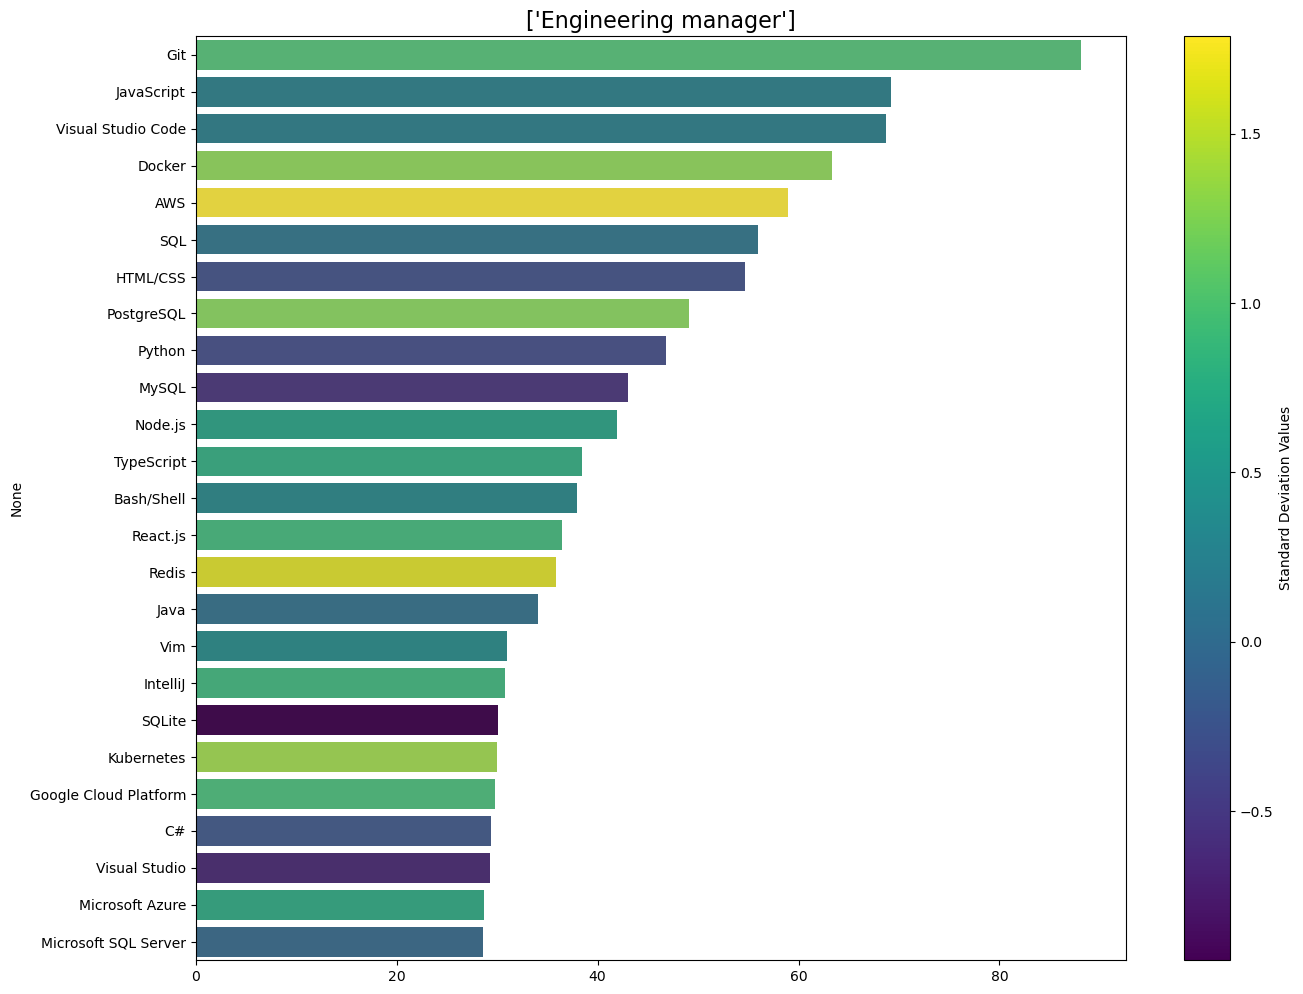

In [42]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd

# # Sample data
# skills = pd.DataFrame(np.random.rand(10, 5), columns=[f"Skill_{i}" for i in range(1, 6)])
# skills_std = pd.DataFrame(np.random.rand(10, 5), columns=[f"Skill_{i}" for i in range(1, 6)])

# # Select a random skill
# name_of_skill = skills.sample(1).index
# sample = skills.loc[name_of_skill].iloc[0].sort_values(ascending=False)[:25]
# sample.index
# sample_std = skills_std.loc[name_of_skill][sample.index]

# Normalize sample_std values to be between 0 and 1 for colormap
norm = plt.Normalize(sample_std.min().min(), sample_std.max().max())

# Use a colormap (e.g., 'viridis')
cmap = plt.cm.viridis
colors = cmap(norm(sample_std.values.flatten()))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 12))

# Create the barplot
bars = sns.barplot(x=sample.values, y=sample.index, palette=colors, ax=ax)

# Create the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required to pass an empty array for ScalarMappable
fig.colorbar(sm, ax=ax, label='Standard Deviation Values')

# Add title
plt.title(name_of_skill, fontsize=16)

# Show the plot
plt.show()
